___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [106]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10, 6)

In [78]:
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


#### Unnamed: 0 

In [80]:
df = df.drop('Unnamed: 0', axis = 1)

#### Clothing ID  

In [81]:
df = df.drop('Clothing ID', axis = 1)

#### Age

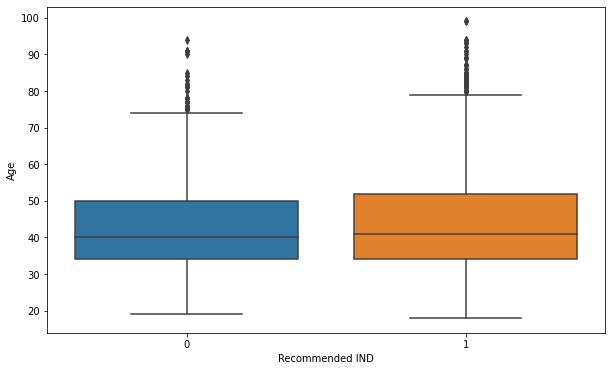

In [82]:
sns.boxplot(x='Recommended IND', y='Age', data=df);

In [83]:
import plotly.express as px

fig = px.histogram(df,
                   x='Age',
                   nbins=60,
                   marginal="box",
                   opacity=0.75)
fig.show()

#### Rating

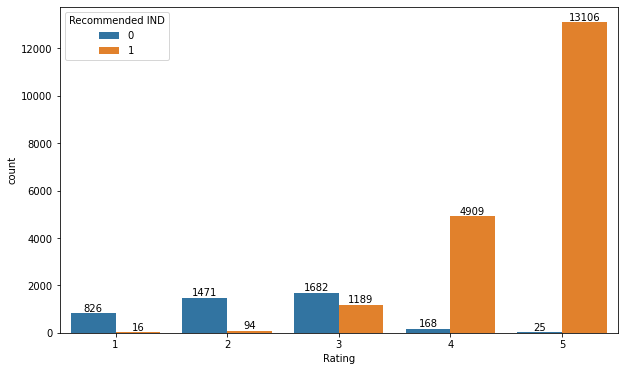

In [84]:
ax = sns.countplot(data=df, x="Rating", hue="Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

#### Recommended IND

In [85]:
df["Recommended IND"].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

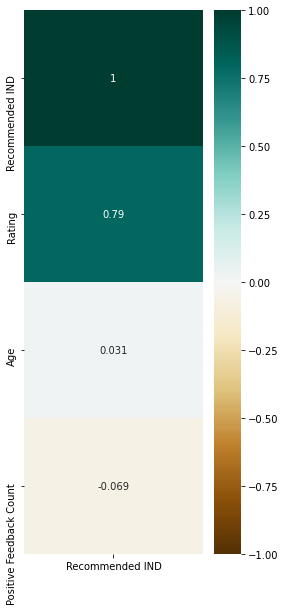

In [86]:
# for the target variable
plt.figure(figsize=(4, 10))
sns.heatmap(data=df.corr()[['Recommended IND']].sort_values(by='Recommended IND', ascending=False),
            vmin = -1, vmax = 1, 
            annot=True, 
            cmap='BrBG');

### Data Wrangling

In [87]:
df["Rating"].value_counts(normalize=True)

5    0.559099
4    0.216171
3    0.122243
2    0.066635
1    0.035851
Name: Rating, dtype: float64

In [75]:
df["Recommended IND"].value_counts(normalize=True)

1    0.822362
0    0.177638
Name: Recommended IND, dtype: float64

- Ratings 1 and 2 are negative, 4 and 5 are positive, 3 are usually neutral. 
- Even if rating are evaluated as 1,2 and 3, some films are positively recommended. So we should consider "Rating" and "Recommended" columns together
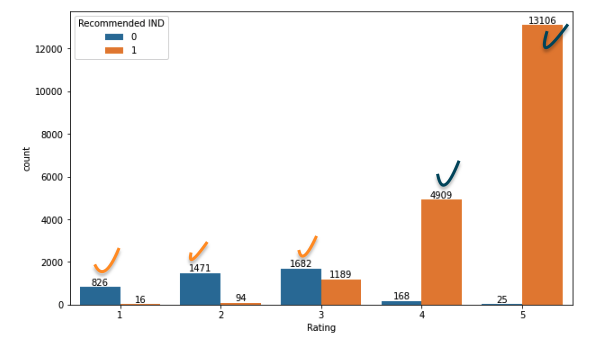
- When choosing label values, we will prefer columns with high data.

In [89]:
df = df[~((df["Rating"] == 1) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 2) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 3) & (df["Recommended IND"] == 1))]
df = df[~((df["Rating"] == 4) & (df["Recommended IND"] == 0))]
df = df[~((df["Rating"] == 5) & (df["Recommended IND"] == 0))]

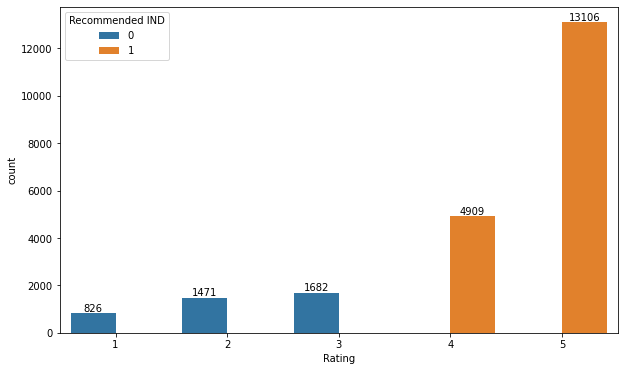

In [90]:
ax = sns.countplot(data=df, x="Rating", hue="Recommended IND")
for p in ax.containers:
    ax.bar_label(p)

#### Check Proportion of Target Class Variable:

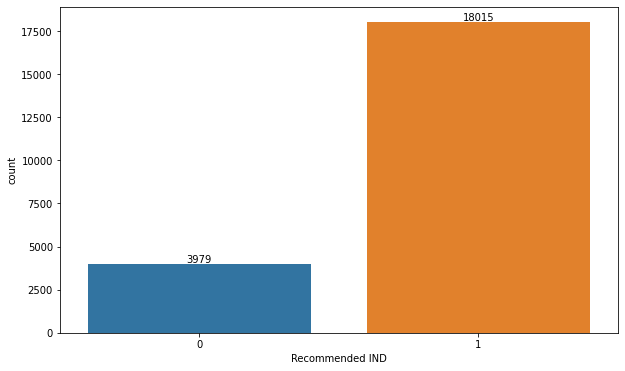

In [92]:
plt.fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(df["Recommended IND"])
ax.bar_label(ax.containers[0]);

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [93]:
df["Recommended IND"].value_counts(normalize=True)

1    0.819087
0    0.180913
Name: Recommended IND, dtype: float64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [94]:
df.rename(columns={
    "Review Text": "text",
    "Recommended IND": "label"
}, inplace=True)

df = df[['text', 'label']]

df.head()

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1


---
---


### Missing Value Detection

In [95]:
df.isnull().sum()

text     819
label      0
dtype: int64

In [99]:
df.dropna(inplace=True)  # drop missing values
df.reset_index(drop=True, inplace=True) # we need to reset index numbers as we remove missing rows
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,1
1,Love this dress! it's sooo pretty. i happene...,1
2,I had such high hopes for this dress and reall...,0
3,"I love, love, love this jumpsuit. it's fun, fl...",1
4,This shirt is very flattering to all due to th...,1
...,...,...
21170,I was surprised at the positive reviews for th...,0
21171,So i wasn't sure about ordering this skirt bec...,1
21172,I was very happy to snag this dress at such a ...,1
21173,"This fit well, but the top was very see throug...",0


---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [103]:
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('punkt')

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to /Users/bzb/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<IPython.core.display.Javascript object>

[nltk_data] Downloading package wordnet to /Users/bzb/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<IPython.core.display.Javascript object>

[nltk_data] Downloading package punkt to /Users/bzb/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [107]:
stop_words = stopwords.words('english')

for i in ["not", "no"]:
        stop_words.remove(i)

In [108]:
def cleaning(data):

    import re

    #1. Removing upper brackets to keep negative auxiliary verbs in text
    data = data.replace("'", "")

    #2. Tokenize
    text_tokens = word_tokenize(data.lower())

    #3. Remove Puncs and number
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]

    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]

    #5. lemma
    text_cleaned = [
        WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw
    ]

    #joining
    return " ".join(text_cleaned)

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

#### Positive Reviews Cleaning

In [109]:
positive_reviews = df.loc[df["label"] == 1]['text']
positive_reviews = positive_reviews.apply(cleaning)
positive_reviews

0              absolutely wonderful silky sexy comfortable
1        love dress sooo pretty happened find store im ...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flattering due adjustable front tie perf...
6        aded basket hte last mintue see would look lik...
                               ...                        
21168    bottom cute defiantly cheeky would recommend s...
21169    im impressed beautiful color combination embro...
21171    wasnt sure ordering skirt couldnt see person f...
21172    happy snag dress great price easy slip flatter...
21174    dress lovely platinum feminine fit perfectly e...
Name: text, Length: 17261, dtype: object

#### Negative Reviews Cleaning

In [110]:
negative_reviews = df.loc[df["label"] == 0]['text']
negative_reviews = negative_reviews.apply(cleaning)
negative_reviews

2        high hope dress really wanted work initially o...
5        love tracy reese dress one not petite foot tal...
10       dress run small esp zipper area run ordered sp...
20       first not pullover styling side zipper wouldnt...
22       loved material didnt really look long dress pu...
                               ...                        
21145    tried color really pretty fun donset want pair...
21146    wanted love jacket soft great color unfortunat...
21155    purchased good price typically love maeve fabr...
21170    surprised positive review product terrible cut...
21173    fit well top see never would worked im glad ab...
Name: text, Length: 3914, dtype: object

### Collect Words (positive and negative separately)

In [116]:
positive_words = " ".join(positive_reviews)
positive_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

In [117]:
negative_words = " ".join(negative_reviews)
negative_words[:100]

'high hope dress really wanted work initially ordered petite small usual size found outrageously smal'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [118]:
# pip install wordcloud
from wordcloud import WordCloud

In [119]:
worldcloud = WordCloud(background_color="white", max_words=250)
# en cok kullanilan ilk 250 kelime uzerinden wordcloud olustur

In [121]:
worldcloud.generate(positive_words)

#### Positive word's recommended word cloud

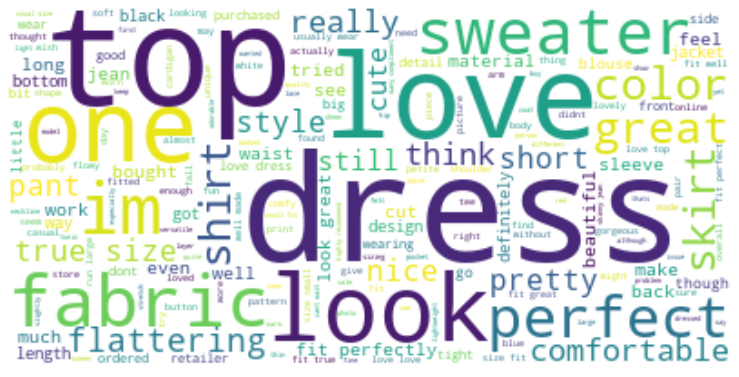

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(13, 13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")  # cerceveleri siliyor
plt.show()

#### Negative word's recommended word cloud

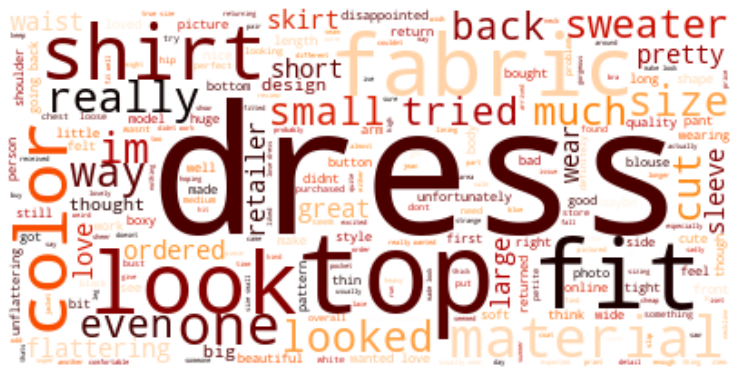

In [123]:
import matplotlib.pyplot as plt
worldcloud = WordCloud(background_color="white", max_words=250, colormap='gist_heat')

worldcloud.generate(negative_words)

plt.figure(figsize=(13, 13))
plt.imshow(worldcloud, interpolation="bilinear")
plt.axis("off")  # cerceveleri siliyor
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [125]:
from sklearn.model_selection import train_test_split

In [124]:
df['label'] = df['label'].map({1:0, 0:1}) # changing target values

X = df["text"].values
y = df['label'].values

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1, # we need more data 
                                                    stratify=y,
                                                    random_state=101)

In [127]:
X_train  # we haven't clean our data yet

array(['Not sure why this shirt is getting bad reviews. i am tall and have a long torso, so perhaps that is the issue for some who find it not so flattering? maybe if your taller it hangs better? i have to say... i love everything about it. it is a fantastic print, it is very flowy but i don\'t think it\'s too much in that regard. i think it is fitting with the romantic, girly style of the garment. in my opinion not too short, just right. i took a medium, i am 5\'8" and athletic.',
       "Looks really nice on teh pictures. i tried on thre cream as this was the only color availalbe at my store (tried on per stylist recommendation(. it is very thin, you can see ripples from my belly lol, but still fairly flattering. i ended up purchasing, but it is in my maybe pile for now... wil lwait before wearing it to be sure. can't wear a grey bar with it, that htin...",
       'This is my third pair of these pants. they are my everyday staple, good for work or play',
       ...,
       "I love th

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [129]:
from sklearn.feature_extraction.text import CountVectorizer

In [130]:
vectorizer = CountVectorizer(preprocessor=cleaning, # yukarida tanimladigimiz fonksiyonu yazdik 
                             # sayisal forma donustururken, ayni zamanda yukarda tanimlanan temizligi yapiyor
                            min_df=3,  # 3 veya daha az gecen tokenleri ignore et. 
                            ngram_range=(1,2))                         

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [132]:
# checking vectorized tokens
pd.DataFrame(X_train_count.toarray(),
             columns=vectorizer.get_feature_names_out())

# we have  38400 features

,aa,ab,abby,abdomen,ability,able,able button,able buy,able dress,able easily,able find,able fit,able fix,able get,able go,able grab,able keep,able order,able pull,able purchase,able put,able see,able size,able snag,able stretch,able try,able tuck,able use,able wear,able zip,abo,absolute,absolute best,absolute favorite,absolutely,absolutely adorable,absolutely adore,absolutely amazing,absolutely beautiful,absolutely darling,...,zip dress,zip im,zip nice,zip not,zip past,zip side,zip size,zip top,zip waist,zip way,zipped,zipped would,zipper,zipper add,zipper back,zipper bit,zipper button,zipper detail,zipper difficult,zipper front,zipper get,zipper go,zipper got,zipper im,zipper little,zipper not,zipper one,zipper pocket,zipper seems,zipper side,zipper split,zipper stick,zipper top,zipper wouldnt,zipper zip,zippered,zippered pocket,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19052,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19053,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19054,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19055,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [133]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [136]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning, min_df=3, ngram_range=(1,2))
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [137]:
pd.DataFrame(X_train_tf_idf.toarray(),
             columns=tf_idf_vectorizer.get_feature_names_out())

,aa,ab,abby,abdomen,ability,able,able button,able buy,able dress,able easily,able find,able fit,able fix,able get,able go,able grab,able keep,able order,able pull,able purchase,able put,able see,able size,able snag,able stretch,able try,able tuck,able use,able wear,able zip,abo,absolute,absolute best,absolute favorite,absolutely,absolutely adorable,absolutely adore,absolutely amazing,absolutely beautiful,absolutely darling,...,zip dress,zip im,zip nice,zip not,zip past,zip side,zip size,zip top,zip waist,zip way,zipped,zipped would,zipper,zipper add,zipper back,zipper bit,zipper button,zipper detail,zipper difficult,zipper front,zipper get,zipper go,zipper got,zipper im,zipper little,zipper not,zipper one,zipper pocket,zipper seems,zipper side,zipper split,zipper stick,zipper top,zipper wouldnt,zipper zip,zippered,zippered pocket,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19054,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19055,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.

## Logistic Regression

#### Eval Functions

In [140]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score


def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))

### CountVectorizer

In [138]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(C=0.02, # overfittingi giderir (default C=1.0)
                         # ne kadar kucuk olursa, uyguladigi regresyon katsayisi o kadar buyuk olur 
                         max_iter=1000,  # max_iter ile ilgili hata alirsan bu degeri arttir
                         class_weight='balanced', # pozitif degerler de onemli
                        # sadece neg label kullandigimiz icin burada ihtiyac yok
                         random_state=101)

log.fit(X_train_count, y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [141]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[1522  205]
 [  50  341]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1727
           1       0.62      0.87      0.73       391

    accuracy                           0.88      2118
   macro avg       0.80      0.88      0.83      2118
weighted avg       0.90      0.88      0.89      2118

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.92      0.95     15534
           1       0.73      0.94      0.82      3523

    accuracy                           0.92     19057
   macro avg       0.86      0.93      0.89     19057
weighted avg       0.94      0.92      0.93     19057



In [143]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision-1': make_scorer(precision_score, pos_label=1),
    'recall-1': make_scorer(recall_score, pos_label=1),
    'f1-1': make_scorer(f1_score, pos_label=1)
}

model = LogisticRegression(C=0.01,
                           max_iter=1000,
                           class_weight="balanced",
                           random_state=101)

scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring=scoring,
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.887391
test_precision-1    0.644997
test_recall-1       0.871976
test_f1-1           0.741254
dtype: float64

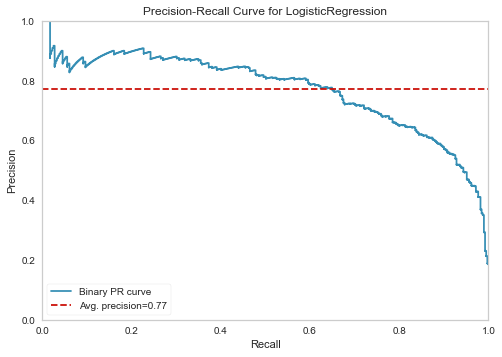

In [193]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(LogisticRegression(C=0.01,
                                              max_iter=1000,
                                              class_weight="balanced",
                                              random_state=101),
                           classes=log.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();

In [145]:
y_pred = log.predict(X_test_count)
log_AP_count = viz.score_
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test, y_pred)

### TF-IDF

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [153]:
log = LogisticRegression(C=0.06,
                         max_iter=1000,
                         random_state=101,
                         class_weight="balanced")
log.fit(X_train_tf_idf, y_train)

LogisticRegression(C=0.06, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [154]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[1490  237]
 [  50  341]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      1727
           1       0.59      0.87      0.70       391

    accuracy                           0.86      2118
   macro avg       0.78      0.87      0.81      2118
weighted avg       0.90      0.86      0.87      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     15534
           1       0.65      0.91      0.76      3523

    accuracy                           0.89     19057
   macro avg       0.81      0.90      0.84     19057
weighted avg       0.92      0.89      0.90     19057



In [155]:
model = LogisticRegression(C=0.06,
                           max_iter=1000,
                           random_state=101,
                           class_weight="balanced")

scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.877998
test_precision-1    0.622162
test_recall-1       0.867154
test_f1-1           0.724354
dtype: float64

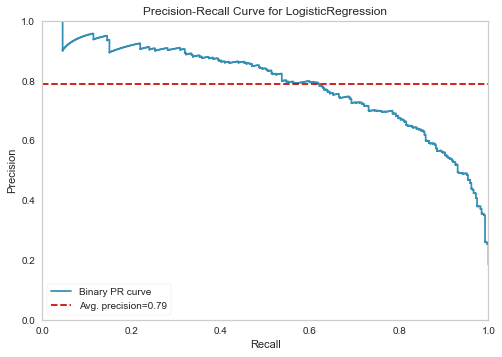

In [192]:
viz = PrecisionRecallCurve(LogisticRegression(C=0.06,
                                              max_iter=1000,
                                              random_state=101,
                                              class_weight="balanced"),
                           classes=log.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [157]:
y_pred = log.predict(X_test_tf_idf)
log_AP_tfidf = viz.score_
log_tfidf_rec = recall_score(y_test, y_pred)
log_tfidf_f1 = f1_score(y_test,y_pred)

## Naive Bayes 

### Countvectorizer

In [158]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

In [159]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1727    0]
 [ 345   46]]
Test_Set
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1727
           1       1.00      0.12      0.21       391

    accuracy                           0.84      2118
   macro avg       0.92      0.56      0.56      2118
weighted avg       0.86      0.84      0.78      2118

Train_Set
              precision    recall  f1-score   support

           0       0.85      1.00      0.92     15534
           1       0.99      0.25      0.39      3523

    accuracy                           0.86     19057
   macro avg       0.92      0.62      0.66     19057
weighted avg       0.88      0.86      0.82     19057



In [160]:
model = MultinomialNB()

scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring=scoring,
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.835021
test_precision-1    0.977758
test_recall-1       0.110134
test_f1-1           0.197691
dtype: float64

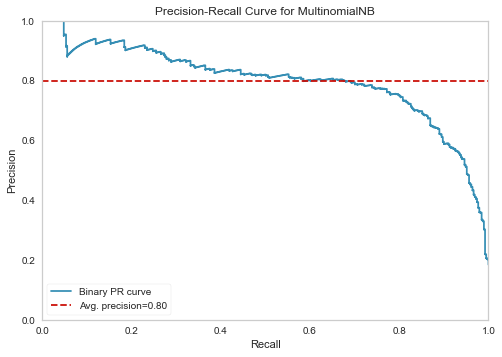

In [191]:
viz = PrecisionRecallCurve(MultinomialNB(),
                           classes=nb.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();

In [162]:
y_pred = nb.predict(X_test_count)
nb_AP_count = viz.score_
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test, y_pred)

### TF-IDF

In [163]:
nb = BernoulliNB()
nb.fit(X_train_tf_idf,y_train)

BernoulliNB()

In [164]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[1612  115]
 [ 100  291]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      1727
           1       0.72      0.74      0.73       391

    accuracy                           0.90      2118
   macro avg       0.83      0.84      0.83      2118
weighted avg       0.90      0.90      0.90      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     15534
           1       0.82      0.88      0.85      3523

    accuracy                           0.94     19057
   macro avg       0.90      0.92      0.91     19057
weighted avg       0.94      0.94      0.94     19057



In [165]:
model = BernoulliNB()

scores = cross_validate(model,
                        X_train_tf_idf, 
                        y_train,
                        scoring=scoring,
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.899250
test_precision-1    0.716375
test_recall-1       0.753914
test_f1-1           0.734476
dtype: float64

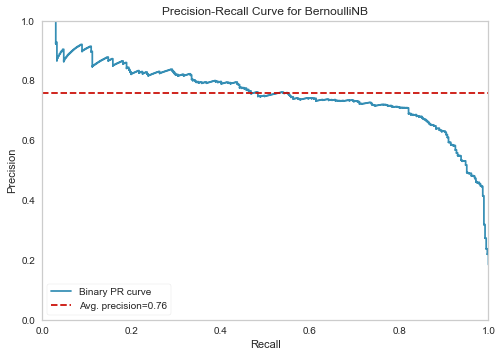

In [190]:
viz = PrecisionRecallCurve(BernoulliNB(),
                           classes=nb.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [167]:
y_pred = nb.predict(X_test_tf_idf)
nb_AP_tfidf = viz.score_
nb_tfidf_rec = recall_score(y_test, y_pred)
nb_tfidf_f1 = f1_score(y_test,y_pred)

## Support Vector Machine (SVM)

### Countvectorizer

In [168]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.001,
                class_weight="balanced",
                random_state=101)

svc.fit(X_train_count, y_train)

LinearSVC(C=0.001, class_weight='balanced', random_state=101)

In [169]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[1507  220]
 [  49  342]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92      1727
           1       0.61      0.87      0.72       391

    accuracy                           0.87      2118
   macro avg       0.79      0.87      0.82      2118
weighted avg       0.90      0.87      0.88      2118

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     15534
           1       0.69      0.93      0.79      3523

    accuracy                           0.91     19057
   macro avg       0.84      0.92      0.87     19057
weighted avg       0.93      0.91      0.92     19057



In [170]:
model = LinearSVC(C=0.001,
                  class_weight="balanced",
                  random_state=101)

scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring=scoring,
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.888073
test_precision-1    0.646504
test_recall-1       0.872825
test_f1-1           0.742585
dtype: float64

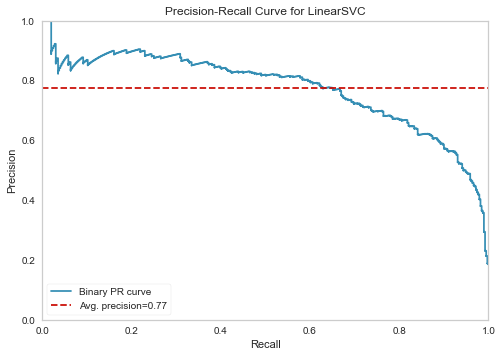

In [189]:
viz = PrecisionRecallCurve(LinearSVC(C=0.001,
                                     class_weight="balanced",
                                     random_state=101),
                           classes=svc.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();

In [172]:
y_pred = svc.predict(X_test_count)
svc_AP_count = viz.score_
svc_count_rec = recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test,y_pred)

### TD-IDF

In [173]:
svc = LinearSVC(C=0.03,
                class_weight="balanced",
                random_state=101)

svc.fit(X_train_tf_idf, y_train)

LinearSVC(C=0.03, class_weight='balanced', random_state=101)

In [174]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[1521  206]
 [  45  346]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1727
           1       0.63      0.88      0.73       391

    accuracy                           0.88      2118
   macro avg       0.80      0.88      0.83      2118
weighted avg       0.91      0.88      0.89      2118

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     15534
           1       0.72      0.95      0.82      3523

    accuracy                           0.92     19057
   macro avg       0.85      0.93      0.88     19057
weighted avg       0.94      0.92      0.92     19057



In [175]:
model = LinearSVC(C=0.03,
                  class_weight="balanced",
                  random_state=101)

scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring=scoring, cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.895944
test_precision-1    0.667256
test_recall-1       0.873682
test_f1-1           0.756402
dtype: float64

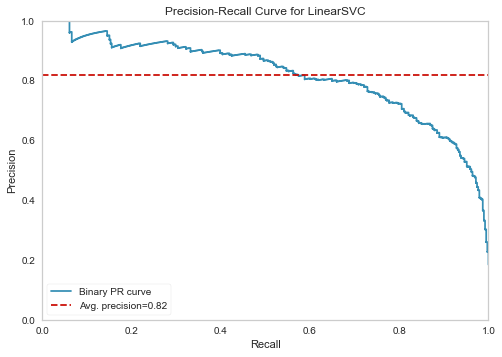

In [188]:
viz = PrecisionRecallCurve(LinearSVC(C=0.03,
                                     class_weight="balanced",
                                     random_state=101),
                           classes=svc.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [177]:
y_pred = svc.predict(X_test_tf_idf)
svc_AP_tfidf = viz.score_
svc_tfidf_rec = recall_score(y_test, y_pred)
svc_tfidf_f1 = f1_score(y_test, y_pred)

## Random Forest

### Countvectorizer

In [178]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(100,
                            max_depth=9,
                            random_state=42,
                            n_jobs=-1,
                            class_weight="balanced")

rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [179]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[1515  212]
 [  67  324]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.88      0.92      1727
           1       0.60      0.83      0.70       391

    accuracy                           0.87      2118
   macro avg       0.78      0.85      0.81      2118
weighted avg       0.89      0.87      0.88      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     15534
           1       0.67      0.86      0.76      3523

    accuracy                           0.90     19057
   macro avg       0.82      0.88      0.85     19057
weighted avg       0.91      0.90      0.90     19057



In [180]:
model = RandomForestClassifier(100,
                               max_depth=9,
                               random_state=42,
                               n_jobs=-1,
                               class_weight="balanced")

scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring=scoring, cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.872856
test_precision-1    0.619014
test_recall-1       0.813800
test_f1-1           0.703036
dtype: float64

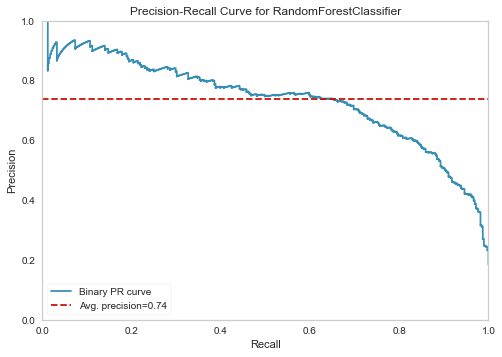

In [181]:
viz = PrecisionRecallCurve(
    RandomForestClassifier(100, max_depth = 9, random_state = 42, n_jobs = -1, class_weight="balanced"),
    classes=rf.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [182]:
y_pred = rf.predict(X_test_count)
rf_AP_count = viz.score_
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)

### TF-IDF

In [183]:
rf = RandomForestClassifier(100,
                            max_depth=9,
                            random_state=42,
                            n_jobs=-1,
                            class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=9, n_jobs=-1,
                       random_state=42)

In [184]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[1525  202]
 [  72  319]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      1727
           1       0.61      0.82      0.70       391

    accuracy                           0.87      2118
   macro avg       0.78      0.85      0.81      2118
weighted avg       0.89      0.87      0.88      2118

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.92      0.94     15534
           1       0.70      0.86      0.77      3523

    accuracy                           0.91     19057
   macro avg       0.83      0.89      0.86     19057
weighted avg       0.92      0.91      0.91     19057



In [185]:
model = RandomForestClassifier(100,
                               max_depth=9,
                               random_state=42,
                               n_jobs=-1,
                               class_weight="balanced")

scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring=scoring,
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.874482
test_precision-1    0.626054
test_recall-1       0.799033
test_f1-1           0.701810
dtype: float64

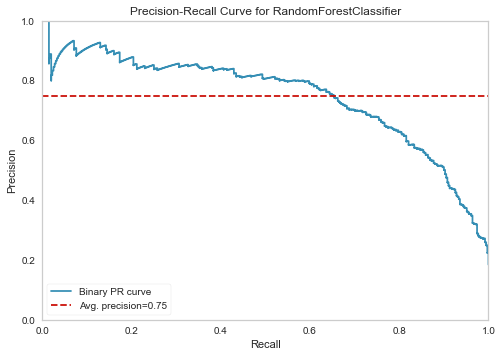

In [186]:
viz = PrecisionRecallCurve(RandomForestClassifier(100,
                                                  max_depth=9,
                                                  random_state=42,
                                                  n_jobs=-1,
                                                  class_weight="balanced"),
                           classes=rf.classes_,
                           per_class=True,
                           cmap="Set1")
viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show()

In [187]:
y_pred = rf.predict(X_test_tf_idf)
rf_AP_tfidf = viz.score_
rf_tfidf_rec = recall_score(y_test, y_pred)
rf_tfidf_f1 = f1_score(y_test, y_pred)

## Ada Boosting

### Countvectorizer

In [194]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=500,
                         random_state=42,
                         learning_rate=0.8)

ada.fit(X_train_count, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=500, random_state=42)

In [195]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[1654   73]
 [ 136  255]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1727
           1       0.78      0.65      0.71       391

    accuracy                           0.90      2118
   macro avg       0.85      0.80      0.82      2118
weighted avg       0.90      0.90      0.90      2118

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     15534
           1       0.88      0.74      0.81      3523

    accuracy                           0.93     19057
   macro avg       0.91      0.86      0.88     19057
weighted avg       0.93      0.93      0.93     19057



In [196]:
model = AdaBoostClassifier(n_estimators=500,
                           random_state=42,
                           learning_rate=0.8)

scores = cross_validate(model,
                        X_train_count,
                        y_train,
                        scoring=scoring,
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy       0.907279
test_precision-1    0.798976
test_recall-1       0.666196
test_f1-1           0.726240
dtype: float64

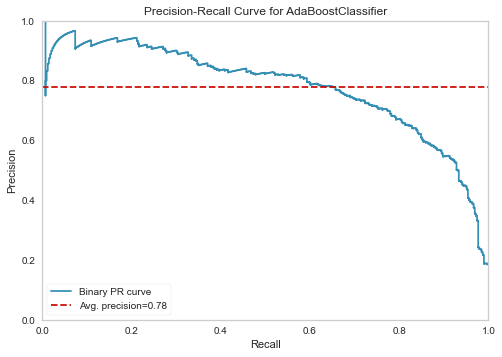

In [199]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators=500,
                                              random_state=42,
                                              learning_rate=0.8),
                           classes=ada.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_count, y_train)
viz.score(X_test_count, y_test)
viz.show();

In [198]:
y_pred = ada.predict(X_test_count)
ada_AP_count = viz.score_
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test, y_pred)

### TF-IDF

In [200]:
ada = AdaBoostClassifier(n_estimators=200,
                         random_state=42,
                         learning_rate=0.8)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(learning_rate=0.8, n_estimators=200, random_state=42)

In [201]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[1647   80]
 [ 142  249]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1727
           1       0.76      0.64      0.69       391

    accuracy                           0.90      2118
   macro avg       0.84      0.80      0.81      2118
weighted avg       0.89      0.90      0.89      2118

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     15534
           1       0.84      0.69      0.76      3523

    accuracy                           0.92     19057
   macro avg       0.89      0.83      0.85     19057
weighted avg       0.91      0.92      0.91     19057



In [ ]:
model = AdaBoostClassifier(n_estimators=200,
                           random_state=42,
                           learning_rate=0.8)

scores = cross_validate(model,
                        X_train_tf_idf,
                        y_train,
                        scoring=scoring,
                        cv=10)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

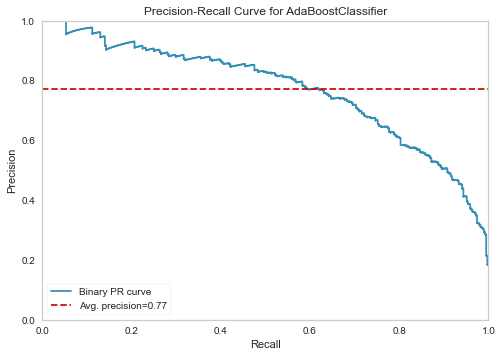

In [203]:
viz = PrecisionRecallCurve(AdaBoostClassifier(n_estimators=200,
                                              random_state=42,
                                              learning_rate=0.8),
                           classes=ada.classes_,
                           per_class=True,
                           cmap="Set1")

viz.fit(X_train_tf_idf, y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [204]:
y_pred = ada.predict(X_test_tf_idf)
ada_AP_tfidf = viz.score_
ada_tfidf_rec = recall_score(y_test, y_pred)
ada_tfidf_f1 = f1_score(y_test, y_pred)

## DL modeling

In [205]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [206]:
df

,text,label
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0
...,...,...
21170,I was surprised at the positive reviews for th...,1
21171,So i wasn't sure about ordering this skirt bec...,0
21172,I was very happy to snag this dress at such a ...,0
21173,"This fit well, but the top was very see throug...",1


In [207]:
df.shape

(21175, 2)

### Tokenization

In [208]:
num_words = 15000  # corpusta geçen en fazla kullanılan ilk 15.000 kelimeyi(tokeni) dikkate alir

tokenizer = Tokenizer(
    num_words=num_words)  # noktalama isaretler ve rakamlar dahil degildir

In [209]:
tokenizer.fit_on_texts(X)

### Creating word index

In [210]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'so': 15,
 'was': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'are': 26,
 'fit': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'wear': 31,
 'me': 32,
 "it's": 33,
 'great': 34,
 'or': 35,
 'too': 36,
 "i'm": 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'they': 41,
 'up': 42,
 'would': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'more': 49,
 'perfect': 50,
 'really': 51,
 'little': 52,
 'ordered': 53,
 'if': 54,
 'these': 55,
 'will': 56,
 'one': 57,
 'flattering': 58,
 'soft': 59,
 'well': 60,
 'an': 61,
 'out': 62,
 'can': 63,
 'comfortable': 64,
 'back': 65,
 'because': 66,
 'had': 67,
 'bought': 68,
 '\r': 69,
 'nice': 70,
 'cute': 71,
 'beautiful': 72,
 'than': 73,
 'fits': 74,
 'looks': 75,
 'all': 76,
 'when': 77,
 'bit': 78,
 'down': 79,


In [211]:
len(tokenizer.word_index)

14389

### Converting tokens to numeric

In [212]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [213]:
X[105]

'The design/shape of the dress are quite flattering, flirty and feminine. but.... there is no way that the dress i received is new. the color is a faded washed out red and there are black stains all over the belt area. there is no tag... the fabric looks droopy and laundered and is not crisp, stiff or new. i am very disappointed by the quality of the item that i received. undoubtedly this one is going back.\n\ndear retailer - please make sure that you do not send pre-owend clothing articles to'

In [214]:
print(X_num_tokens[105])

[1, 145, 188, 13, 1, 18, 26, 261, 58, 1279, 3, 376, 10, 130, 6, 139, 118, 20, 1, 18, 2, 238, 6, 438, 1, 47, 6, 4, 1238, 433, 62, 262, 3, 130, 26, 120, 2600, 76, 150, 1, 411, 313, 130, 6, 139, 815, 1, 45, 75, 2849, 3, 3162, 3, 6, 19, 1467, 650, 35, 438, 2, 38, 23, 340, 244, 1, 96, 13, 1, 551, 20, 2, 238, 6502, 7, 57, 6, 181, 65, 3862, 102, 839, 189, 228, 20, 40, 134, 19, 1054, 2180, 8292, 651, 5549, 8]


### Maximum number of tokens for all documents¶

In [215]:
len(X_num_tokens[105])

93

In [216]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [217]:
num_tokens.mean() # her yorum ortalama 60 tokenden olusuyor

60.2330106257379

In [218]:
num_tokens.max()
# istenen, tum yorumlari en uzun yoruma sabitlemek
# bu sayede herhangi bir bilgi kaybi olmadan modeli egitebilirim ama maliyeti yukseltir 

116

In [219]:
X[num_tokens.argmax()] # listedeki en uzun yorum

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [220]:
max_tokens = 116

In [221]:
sum(num_tokens <= max_tokens) / len(num_tokens)
# tum yorumlari 116 tokene esitlersem kayip yasamam

1.0

### Fixing token counts of all documents (pad_sequences)

In [229]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [230]:
X_pad.shape

(21175, 116)

### Train Set Split

In [231]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pad,  # sabitlenen corpusu veririz
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)

### Modeling

In [232]:
model = Sequential()

embedding_size = 50

model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(Dropout(0.2)) 

model.add(GRU(units=48, return_sequences=True))
model.add(Dropout(0.2))

#model.add(GRU(units=24, return_sequences=True))
#model.add(Dropout(0.2))
model.add(GRU(units=24))

model.add(Dense(1, activation='sigmoid'))

In [233]:
optimizer = Adam(lr=0.001)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

model.summary() 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 116, 50)           750000    
                                                                 
 dropout_4 (Dropout)         (None, 116, 50)           0         
                                                                 
 gru_4 (GRU)                 (None, 116, 48)           14400     
                                                                 
 dropout_5 (Dropout)         (None, 116, 48)           0         
                                                                 
 gru_5 (GRU)                 (None, 24)                5328      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 769,753
Trainable params: 769,753
Non-tr

In [234]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           verbose=1,
                           patience=2,
                           restore_best_weights=True)

In [235]:
from sklearn.utils import class_weight

classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61339642, 2.70465512])

In [236]:
model.fit(X_train,
          y_train,
          epochs=25,
          batch_size=256,
          sample_weight=classes_weights,
          validation_data=(X_test, y_test),
          callbacks=[early_stop])

Epoch 1/25
75/75 [==============================] - 15s 173ms/step - loss: 0.5010 - recall: 0.7425 - val_loss: 0.4033 - val_recall: 0.9437
Epoch 2/25
75/75 [==============================] - 14s 182ms/step - loss: 0.2458 - recall: 0.9214 - val_loss: 0.2736 - val_recall: 0.8670
Epoch 3/25
75/75 [==============================] - 13s 179ms/step - loss: 0.1834 - recall: 0.9441 - val_loss: 0.3090 - val_recall: 0.8977
Epoch 3: early stopping


### Model Evaluation

In [237]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.500986,0.742549,0.403300,0.943734
1,0.245827,0.921374,0.273573,0.867008
2,0.183383,0.944082,0.308972,0.897698


In [238]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score


y_train_pred = model.predict(X_train) >= 0.5
# olasilik dondurur. True olanlar 1, false olanlar 0 davranir
# inbalance datalarda train ve test icin bu sonuclar kiyaslanir

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

596/596 [==============================] - 6s 10ms/step
[[12566  2968]
 [  120  3403]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     15534
           1       0.53      0.97      0.69      3523

    accuracy                           0.84     19057
   macro avg       0.76      0.89      0.79     19057
weighted avg       0.91      0.84      0.85     19057



In [239]:
y_pred = model.predict(X_test) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

# degerler train datasi ile paralel

67/67 [==============================] - 1s 11ms/step
[[1379  348]
 [  22  369]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.80      0.88      1727
           1       0.51      0.94      0.67       391

    accuracy                           0.83      2118
   macro avg       0.75      0.87      0.77      2118
weighted avg       0.90      0.83      0.84      2118



67/67 [==============================] - 1s 14ms/step


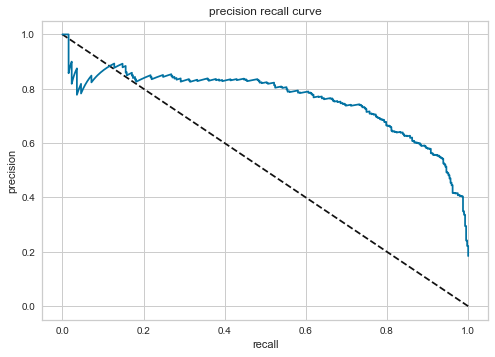

In [240]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba,)
plt.plot([1,0],[0,1],'k--')
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('precision recall curve')
plt.show()

In [241]:
average_precision_score(y_test, y_pred_proba)

0.7615564996372414

In [242]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

## BERT Modeling

In [244]:
# pip install transformers

### Tokenization

In [245]:
import numpy as np
import pandas as pd

In [246]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

max_len = 0
max_token = []  # her yorumun kac tokenden olustugunu saymak istiyoruz

for sent in X:

    # add_special_tokens=True ile baslangic ve bitis tokenlerini ilave ediyoruz
    input_ids = tokenizer.encode(sent.lower(), add_special_tokens=True)
    max_token.append(len(input_ids))

    # Update the maximum sentence length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)
# bert modeli en fazla 512 token hafizasinda tutuyordu
# bizim modelimizde 758 tokenli olan veri oldugu icin hata verir

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Max sentence length:  162


In [248]:
np.array(max_token).mean()

76.31556080283353

In [249]:
sum(np.array(max_token) <= 162) / len(max_token)

1.0

In [250]:
def transformation(X):
    # set array dimensions
    seq_len = 162
    num_samples = len(X)

    # initialize empty zero arrays
    Xids = np.zeros((num_samples, seq_len))
    Xmask = np.zeros((num_samples, seq_len))

    for i, phrase in enumerate(X):
        tokens = tokenizer.encode_plus(phrase.lower(),
                                       max_length=seq_len,
                                       truncation=True,
                                       padding='max_length',
                                       add_special_tokens=True)
        # assign tokenized outputs to respective rows in numpy arrays
        Xids[i, :] = tokens['input_ids']
        Xmask[i, :] = tokens['attention_mask']
    return Xids, Xmask

In [251]:
Xids, Xmask = transformation(X)

In [252]:
Xids.shape

(21175, 162)

In [253]:
Xmask.shape

(21175, 162)

In [254]:
labels = y.reshape(-1,1) # tum yorumlarim tek boyutlu matrixe donustu
labels

array([[0],
       [0],
       [1],
       ...,
       [0],
       [1],
       [0]])

### Transformation text to tensor

In [255]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels)) #tf.data.Dataset.from_tensors((Xids, Xmask, labels))
dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(162,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [256]:
len(dataset)

21175

In [257]:
import tensorflow as tf

dataset = tf.data.Dataset.from_tensor_slices((Xids, Xmask, labels))


def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels


# then we use the dataset map method to apply this transformation
dataset = dataset.map(map_func)

### Train test split

In [258]:
batch_size = 32  #16

# shuffle and batch
# fit into a batch of 32
dataset = dataset.shuffle(243500,
                          reshuffle_each_iteration=False).batch(batch_size, drop_remainder=True)

In [259]:
# set split size (90% training data) and calculate training set size
split = 0.9
size = int(len(dataset) * split)  #int((Xids.shape[0]/batch_size)*split)

# get training and validation sets
train_ds = dataset.take(size)
val_ds = dataset.skip(size)

In [260]:
print(len(dataset))
print(len(dataset)*0.9)
print(int(len(dataset)*0.9))

661
594.9
594


### AdamW optimization

### Creating Model

### Model evaluation

### Compare Models F1 Scores, Recall Scores and Average Precision Score

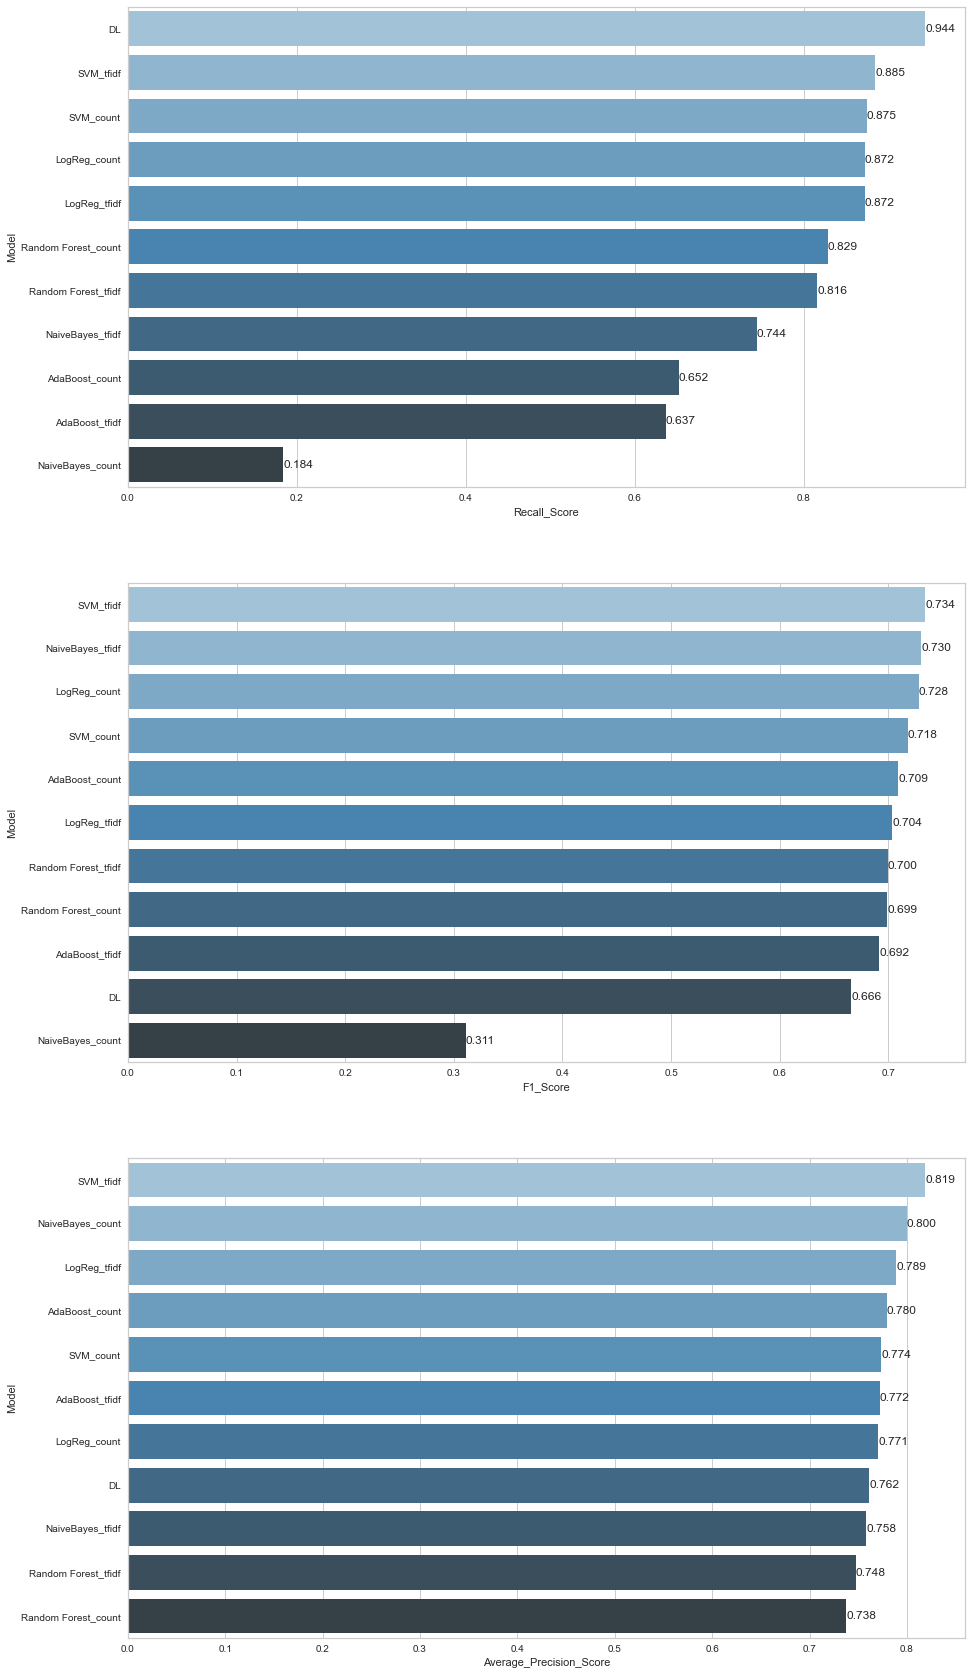

In [261]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count", 
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf", 
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL"
#                                  , "BERT_Weighted", "BERT_Without_Weighted"
                                 ],
                        
                        "F1_Score": [nb_count_f1, log_count_f1, svc_count_f1,
                                             rf_count_f1, ada_count_f1, nb_tfidf_f1, log_tfidf_f1,
                                             svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1
#                                      , BERT_with_weighted_f1, BERT_without_weighted_f1
                                    ],
                        
                        "Recall_Score": [nb_count_rec, log_count_rec, svc_count_rec, 
                                                   rf_count_rec, ada_count_rec, 
                                                  nb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                                  rf_tfidf_rec, ada_tfidf_rec, DL_rec
#                                          , BERT_with_weighted_rec, BERT_without_weighted_rec
                                        ],
                        
                        "Average_Precision_Score": [nb_AP_count, log_AP_count, svc_AP_count, rf_AP_count,
                                                   ada_AP_count, nb_AP_tfidf, log_AP_tfidf, svc_AP_tfidf,
                                                   rf_AP_tfidf, ada_AP_tfidf, DL_AP
#                                                     , BERT_with_weighted_AP, BERT_without_weighted_AP
                                                   ]})

def labels(ax):
                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)


plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show();

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___